# Підготовка та Аналіз даних
## Лабораторна робота №4
## Структури для роботи з великими обсягами даних в Python
<b>Мета роботи</b>: Мета: отримати навички роботи із структурами для зберігання в Python
(python, numpy, pandas, numpy array, dataframe, timeit)
#### <b>Виконав:</b> <i>ФБ-35 Архипчук Віталій</i>

Перш за все виконаємо import потрібних біліотек для подальшої роботи:

In [81]:
import pandas as pd
import numpy as np
import timeit

#### <b>Перший рівень:</b>

<b>PANDAS DATAFRAME:</b>

In [82]:
start_time = timeit.default_timer( )

names = [ 'Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 
        'Sub_metering_2', 'Sub_metering_3' ]

df = pd.read_csv( 'household_power_consumption.txt', sep=';', header=0, names=names, low_memory=False )

df.replace( '?', np.nan, inplace=True ) 
df.dropna( inplace=True )

cols_to_float = [ 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 
                'Sub_metering_2', 'Sub_metering_3' ]
df[ cols_to_float ] = df[ cols_to_float ].astype( float )

df[ 'Date' ] = pd.to_datetime( df['Date'], dayfirst=True )

stop_time = timeit.default_timer( )

print( "Exec time (Pandas dataframe): ", stop_time - start_time )
df

Exec time (Pandas dataframe):  3.5462942000012845


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,2010-11-26,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


<b>NUMPY ARRAY:</b>

In [83]:
start_time = timeit.default_timer( )

types = [ ("Date", "U10"), ("Time", "U8"), ("Global_active_power", "float64"), ("Global_reactive_power", "float64"), ("Voltage","float64"), 
        ("Global_intensity", "float64"), ("Sub_metering_1", "float64"), ("Sub_metering_2", "float64"), ("Sub_metering_3","float64") ]

data = np.genfromtxt( 'household_power_consumption.txt', missing_values=["?",np.nan], delimiter=';', dtype=types, encoding="UTF=8", names=True )

data_cleaned = data[ ~np.isnan(data['Global_active_power']) & ~np.isnan(data['Global_reactive_power']) & 
                    ~np.isnan(data['Voltage']) & ~np.isnan(data['Global_intensity']) &
                    ~np.isnan(data['Sub_metering_1']) & ~np.isnan(data['Sub_metering_2']) & ~np.isnan(data['Sub_metering_3']) ]

stop_time = timeit.default_timer( )

print( "Exec time (NumPy array): ", stop_time - start_time )
print( f"\n {data.dtype.names}" )
print( data_cleaned[:10] )

Exec time (NumPy array):  8.258279900066555

 ('Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3')
[('16/12/2006', '17:24:00', 4.216, 0.418, 234.84, 18.4, 0., 1., 17.)
 ('16/12/2006', '17:25:00', 5.36 , 0.436, 233.63, 23. , 0., 1., 16.)
 ('16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23. , 0., 2., 17.)
 ('16/12/2006', '17:27:00', 5.388, 0.502, 233.74, 23. , 0., 1., 17.)
 ('16/12/2006', '17:28:00', 3.666, 0.528, 235.68, 15.8, 0., 1., 17.)
 ('16/12/2006', '17:29:00', 3.52 , 0.522, 235.02, 15. , 0., 2., 17.)
 ('16/12/2006', '17:30:00', 3.702, 0.52 , 235.09, 15.8, 0., 1., 17.)
 ('16/12/2006', '17:31:00', 3.7  , 0.52 , 235.22, 15.8, 0., 1., 17.)
 ('16/12/2006', '17:32:00', 3.668, 0.51 , 233.99, 15.8, 0., 1., 17.)
 ('16/12/2006', '17:33:00', 3.662, 0.51 , 233.86, 15.8, 0., 2., 16.)]


<b>1. Обрати всі записи, у яких загальна активна споживана потужність перевищує 5 кВт.</b>

<b>(1.)PANDAS DATAFRAME:</b>

In [84]:
start_time = timeit.default_timer( )

filtered_df = df[ df['Global_active_power'] > 5 ]

stop_time = timeit.default_timer( )

print( "Exec time (Pandas dataframe): ", stop_time - start_time )
filtered_df

Exec time (Pandas dataframe):  0.007073499960824847


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
11,2006-12-16,17:35:00,5.412,0.470,232.78,23.2,0.0,1.0,17.0
12,2006-12-16,17:36:00,5.224,0.478,232.99,22.4,0.0,1.0,16.0
...,...,...,...,...,...,...,...,...,...
2069356,2010-11-22,18:40:00,5.408,0.150,231.50,23.6,48.0,0.0,0.0
2069357,2010-11-22,18:41:00,5.528,0.144,232.48,24.6,53.0,0.0,0.0
2071586,2010-11-24,07:50:00,5.172,0.050,235.18,22.0,0.0,38.0,17.0
2071587,2010-11-24,07:51:00,5.750,0.000,234.40,24.6,0.0,39.0,17.0


<b>(1.) NUMPY ARRAY:</b>

In [85]:
start_time = timeit.default_timer( )

filtered = np.where( data['Global_active_power'] > 5 )
filtered_data = data[ filtered ]

stop_time = timeit.default_timer( )

print( "Exec time (NumPy array): ", stop_time - start_time )
print( f"\n {data.dtype.names}" )
print( filtered_data[:10] )

Exec time (NumPy array):  0.022492599906399846

 ('Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3')
[('16/12/2006', '17:25:00', 5.36 , 0.436, 233.63, 23. , 0., 1., 16.)
 ('16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23. , 0., 2., 17.)
 ('16/12/2006', '17:27:00', 5.388, 0.502, 233.74, 23. , 0., 1., 17.)
 ('16/12/2006', '17:35:00', 5.412, 0.47 , 232.78, 23.2, 0., 1., 17.)
 ('16/12/2006', '17:36:00', 5.224, 0.478, 232.99, 22.4, 0., 1., 16.)
 ('16/12/2006', '17:37:00', 5.268, 0.398, 232.91, 22.6, 0., 2., 17.)
 ('16/12/2006', '17:44:00', 5.894, 0.   , 232.69, 25.4, 0., 0., 16.)
 ('16/12/2006', '17:45:00', 7.706, 0.   , 230.98, 33.2, 0., 0., 17.)
 ('16/12/2006', '17:46:00', 7.026, 0.   , 232.21, 30.6, 0., 0., 16.)
 ('16/12/2006', '17:47:00', 5.174, 0.   , 234.19, 22. , 0., 0., 17.)]


<b>2. Обрати всі записи, у яких вольтаж перевищую 235 В.</b>

<b>(2.)PANDAS DATAFRAME:</b>

In [86]:
start_time = timeit.default_timer( )

filtered_df = df[ df['Voltage'] > 235 ]

stop_time = timeit.default_timer( )

print( "Exec time (Pandas dataframe): ", stop_time - start_time )
filtered_df

Exec time (Pandas dataframe):  0.09055810002610087


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,2006-12-16,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,2006-12-16,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,2006-12-16,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
14,2006-12-16,17:38:00,4.054,0.422,235.24,17.6,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,2010-11-26,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


<b>(2.) NUMPY ARRAY:</b>

In [87]:
start_time = timeit.default_timer( )

filtered = np.where( data['Voltage'] > 235 )
filtered_data = data[ filtered ]

stop_time = timeit.default_timer( )

print( "Exec time (NumPy array): ", stop_time - start_time )
print( f"\n {data.dtype.names}" )
print( filtered_data[:10] )

Exec time (NumPy array):  0.13660189998336136

 ('Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3')
[('16/12/2006', '17:28:00', 3.666, 0.528, 235.68, 15.8, 0., 1., 17.)
 ('16/12/2006', '17:29:00', 3.52 , 0.522, 235.02, 15. , 0., 2., 17.)
 ('16/12/2006', '17:30:00', 3.702, 0.52 , 235.09, 15.8, 0., 1., 17.)
 ('16/12/2006', '17:31:00', 3.7  , 0.52 , 235.22, 15.8, 0., 1., 17.)
 ('16/12/2006', '17:38:00', 4.054, 0.422, 235.24, 17.6, 0., 1., 17.)
 ('16/12/2006', '17:39:00', 3.384, 0.282, 237.14, 14.2, 0., 0., 17.)
 ('16/12/2006', '17:40:00', 3.27 , 0.152, 236.73, 13.8, 0., 0., 17.)
 ('16/12/2006', '17:41:00', 3.43 , 0.156, 237.06, 14.4, 0., 0., 17.)
 ('16/12/2006', '17:42:00', 3.266, 0.   , 237.13, 13.8, 0., 0., 18.)
 ('16/12/2006', '17:43:00', 3.728, 0.   , 235.84, 16.4, 0., 0., 17.)]


<b>3. Обрати всі записи, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.</b>

<b>(3.)PANDAS DATAFRAME:</b>

In [88]:
start_time = timeit.default_timer( )

filtered_df = df[ (df['Global_intensity'].between(19, 20)) & (df['Sub_metering_2'] > df['Sub_metering_3']) ]

stop_time = timeit.default_timer( )

print( "Exec time (Pandas dataframe): ", stop_time - start_time )
filtered_df

Exec time (Pandas dataframe):  0.013242899905890226


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
45,2006-12-16,18:09:00,4.464,0.136,234.66,19.0,0.0,37.0,16.0
460,2006-12-17,01:04:00,4.582,0.258,238.08,19.6,0.0,13.0,0.0
464,2006-12-17,01:08:00,4.618,0.104,239.61,19.6,0.0,27.0,0.0
475,2006-12-17,01:19:00,4.636,0.140,237.37,19.4,0.0,36.0,0.0
476,2006-12-17,01:20:00,4.634,0.152,237.17,19.4,0.0,35.0,0.0
...,...,...,...,...,...,...,...,...,...
2071589,2010-11-24,07:53:00,4.666,0.000,235.72,19.8,0.0,39.0,17.0
2071590,2010-11-24,07:54:00,4.694,0.000,236.78,19.8,0.0,39.0,18.0
2071591,2010-11-24,07:55:00,4.602,0.000,237.08,19.4,0.0,40.0,17.0
2071592,2010-11-24,07:56:00,4.536,0.000,237.03,19.0,0.0,39.0,17.0


<b>(3.) NUMPY ARRAY:</b>

In [89]:
start_time = timeit.default_timer( )

filtered_data = data[ ((data['Global_intensity'] >= 19) & (data['Global_intensity'] <= 20)) & ((data['Sub_metering_2'] > data['Sub_metering_3'])) ]

stop_time = timeit.default_timer( )

print( "Exec time (NumPy array): ", stop_time - start_time )
print( f"\n {data.dtype.names}" )
print( filtered_data[:10] )

Exec time (NumPy array):  0.06956949993036687

 ('Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3')
[('16/12/2006', '18:09:00', 4.464, 0.136, 234.66, 19. , 0., 37., 16.)
 ('17/12/2006', '01:04:00', 4.582, 0.258, 238.08, 19.6, 0., 13.,  0.)
 ('17/12/2006', '01:08:00', 4.618, 0.104, 239.61, 19.6, 0., 27.,  0.)
 ('17/12/2006', '01:19:00', 4.636, 0.14 , 237.37, 19.4, 0., 36.,  0.)
 ('17/12/2006', '01:20:00', 4.634, 0.152, 237.17, 19.4, 0., 35.,  0.)
 ('17/12/2006', '01:21:00', 4.652, 0.142, 237.92, 19.4, 0., 36.,  0.)
 ('17/12/2006', '01:52:00', 4.622, 0.24 , 239.59, 19.2, 0., 37.,  0.)
 ('17/12/2006', '09:08:00', 4.762, 0.088, 237.44, 20. , 0., 38.,  0.)
 ('17/12/2006', '09:09:00', 4.506, 0.088, 237.25, 19. , 0., 38.,  0.)
 ('17/12/2006', '10:55:00', 4.444, 0.136, 235.97, 19.2, 2., 50., 17.)]


<b>4. Обрати випадковим чином 500000 записів (без повторів елементів вибірки), для них обчислити середні величини усіх 3-х груп споживання електричної енергії</b>

<b>(4.)PANDAS DATAFRAME:</b>

In [90]:
start_time = timeit.default_timer( )

sample_df = df.sample( n=500000, replace=False, random_state=42 )

mean_values = sample_df[ ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'] ].mean( )

stop_time = timeit.default_timer( )

print( "Exec time (Pandas dataframe): ", stop_time - start_time )
print( mean_values )

Exec time (Pandas dataframe):  0.16006680019199848
Sub_metering_1    1.119258
Sub_metering_2    1.308912
Sub_metering_3    6.452950
dtype: float64


<b>(4.) NUMPY ARRAY:</b>

In [91]:
start_time = timeit.default_timer( )

random_sample = df.sample( n=500000, replace=False )

sub1 = random_sample[ 'Sub_metering_1' ]
sub2 = random_sample[ 'Sub_metering_2' ]
sub3 = random_sample[ 'Sub_metering_3' ]

mean_sub1 = np.mean( sub1) 
mean_sub2 = np.mean( sub2 )
mean_sub3 = np.mean( sub3 )

stop_time = timeit.default_timer( )

print( "Exec time (NumPy array): ", stop_time - start_time )
print( "Sub_metering_1", mean_sub1 )
print( "Sub_metering_2", mean_sub2 )
print( "Sub_metering_3", mean_sub3 )

Exec time (NumPy array):  0.15369329997338355
Sub_metering_1 1.121594
Sub_metering_2 1.301514
Sub_metering_3 6.471928


<b>5. Обрати ті записи, які після 18-00 споживають понад 6 кВт за хвилину в середньому, серед відібраних визначити ті, у яких основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення (група 2 є найбільшою), а потім обрати кожен третій результат із першої половини та кожен четвертий результат із другої половини.</b>

<b>(5.)PANDAS DATAFRAME:</b>

In [92]:
start_time = timeit.default_timer( )

filtered_df = df[ (df['Time'] > '18:00:00') & (df['Global_active_power'] > 6) & (df['Sub_metering_2'] > df['Sub_metering_1']) & 
                (df['Sub_metering_2'] > df['Sub_metering_3'])]

first = filtered_df.iloc[ 0:len(filtered_df)//2:3 ]
second = filtered_df.iloc[ len(filtered_df)//2:len(filtered_df):4 ]
result = pd.concat( [first, second] )

stop_time = timeit.default_timer( )

print( "Exec time (Pandas dataframe): ", stop_time - start_time )
result

Exec time (Pandas dataframe):  0.07813580008223653


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
41,2006-12-16,18:05:00,6.052,0.192,232.93,26.2,0.0,37.0,17.0
44,2006-12-16,18:08:00,6.308,0.116,232.25,27.0,0.0,36.0,17.0
17494,2006-12-28,20:58:00,6.386,0.374,236.63,27.0,1.0,36.0,17.0
17498,2006-12-28,21:02:00,8.088,0.262,235.50,34.4,1.0,72.0,17.0
17501,2006-12-28,21:05:00,7.230,0.152,235.22,30.6,1.0,73.0,17.0
...,...,...,...,...,...,...,...,...,...
2066467,2010-11-20,18:31:00,6.830,0.394,229.39,30.2,24.0,34.0,16.0
2066471,2010-11-20,18:35:00,6.784,0.364,228.38,30.0,21.0,35.0,16.0
2066475,2010-11-20,18:39:00,6.362,0.372,229.83,28.0,16.0,35.0,16.0
2066479,2010-11-20,18:43:00,6.324,0.376,229.93,27.8,14.0,35.0,17.0


<b>(5.) NUMPY ARRAY:</b>

In [93]:
start_time = timeit.default_timer( )

filtered_data1 = np.where( (data['Time'] > '18:00:00') & (data['Global_active_power'] > 6) & (data['Sub_metering_2'] > data['Sub_metering_1']) & 
                           (data['Sub_metering_2'] > data['Sub_metering_3']))
filtered_data = data[ filtered_data1 ]

first = filtered_data[ :len(filtered_data)//2:3 ]  
second = filtered_data[ len(filtered_data)//2::4 ]  
result = np.concatenate( [first, second] )

stop_time = timeit.default_timer( )

print( "Exec time (NumPy array): ", stop_time - start_time )
print( f"\n {data.dtype.names}" )
print( result[:10] )

Exec time (NumPy array):  0.10781920002773404

 ('Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3')
[('16/12/2006', '18:05:00', 6.052, 0.192, 232.93, 26.2,  0., 37., 17.)
 ('16/12/2006', '18:08:00', 6.308, 0.116, 232.25, 27. ,  0., 36., 17.)
 ('28/12/2006', '20:58:00', 6.386, 0.374, 236.63, 27. ,  1., 36., 17.)
 ('28/12/2006', '21:02:00', 8.088, 0.262, 235.5 , 34.4,  1., 72., 17.)
 ('28/12/2006', '21:05:00', 7.23 , 0.152, 235.22, 30.6,  1., 73., 17.)
 ('28/12/2006', '21:08:00', 7.352, 0.   , 235.45, 31.2,  1., 73., 17.)
 ('28/12/2006', '21:11:00', 9.048, 0.   , 231.48, 39. , 34., 71., 16.)
 ('28/12/2006', '21:14:00', 9.118, 0.108, 231.18, 39.4, 36., 72., 16.)
 ('28/12/2006', '21:17:00', 7.04 , 0.13 , 233.27, 30.2, 37., 38., 17.)
 ('29/12/2006', '21:16:00', 6.146, 0.116, 230.53, 26.6,  0., 70.,  0.)]


<b>Висновок по першому рівню:</b>

In [117]:
data = {
    "Завдання": [
        "1.",
        "2.",
        "3.",
        "4.",
        "5."
    ],
    "Pandas (час виконання)": [
        0.007073499960824847,
        0.09055810002610087,  
        0.013242899905890226,  
        0.16006680019199848,
        0.07813580008223653  
    ],
    "NumPy (час виконання)": [
        0.022492599906399846,
        0.13660189998336136,  
        0.06956949993036687,  
        0.15369329997338355,  
        0.10781920002773404   
    ]
}

df_results = pd.DataFrame(data)

df_results

,Завдання,Pandas (час виконання),NumPy (час виконання)
0,1.,0.007073,0.022493
1,2.,0.090558,0.136602
2,3.,0.013243,0.069569
3,4.,0.160067,0.153693
4,5.,0.078136,0.107819


#### <b>Другий рівень:</b>

<b>PANDAS DATAFRAME:</b>

In [95]:
start_time = timeit.default_timer( )

names = [ 'symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base',
           'length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio',
           'horsepower','peak-rpm','city-mpg','highway-mpg','price' ]

df = pd.read_csv( 'automobile/imports-85.data', names=names) 

stop_time = timeit.default_timer( )

print( "Exec time (Pandas dataframe): ", stop_time - start_time )
df

Exec time (Pandas dataframe):  0.005664299940690398


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


<b>NUMPY ARRAY:</b>

In [96]:
start_time = timeit.default_timer( )

data = np.genfromtxt( 'automobile/imports-85.data', delimiter=',', dtype=str )

stop_time = timeit.default_timer( )

print( "Exec time (NumPy array): ", stop_time - start_time )
print( f"\n{data[:5]}" )

Exec time (NumPy array):  0.006974100135266781

[['3' '?' 'alfa-romero' 'gas' 'std' 'two' 'convertible' 'rwd' 'front'
  '88.60' '168.80' '64.10' '48.80' '2548' 'dohc' 'four' '130' 'mpfi'
  '3.47' '2.68' '9.00' '111' '5000' '21' '27' '13495']
 ['3' '?' 'alfa-romero' 'gas' 'std' 'two' 'convertible' 'rwd' 'front'
  '88.60' '168.80' '64.10' '48.80' '2548' 'dohc' 'four' '130' 'mpfi'
  '3.47' '2.68' '9.00' '111' '5000' '21' '27' '16500']
 ['1' '?' 'alfa-romero' 'gas' 'std' 'two' 'hatchback' 'rwd' 'front'
  '94.50' '171.20' '65.50' '52.40' '2823' 'ohcv' 'six' '152' 'mpfi'
  '2.68' '3.47' '9.00' '154' '5000' '19' '26' '16500']
 ['2' '164' 'audi' 'gas' 'std' 'four' 'sedan' 'fwd' 'front' '99.80'
  '176.60' '66.20' '54.30' '2337' 'ohc' 'four' '109' 'mpfi' '3.19' '3.40'
  '10.00' '102' '5500' '24' '30' '13950']
 ['2' '164' 'audi' 'gas' 'std' 'four' 'sedan' '4wd' 'front' '99.40'
  '176.60' '66.40' '54.30' '2824' 'ohc' 'five' '136' 'mpfi' '3.19' '3.40'
  '8.00' '115' '5500' '18' '22' '17450']]


<b>1. Поборотися із зниклими даними.</b>

<b>(1.)PANDAS DATAFRAME (1 спосіб):</b>

In [97]:
start_time = timeit.default_timer( )

df.replace( '?', np.nan, inplace=True )
df.dropna( inplace=True )

stop_time = timeit.default_timer( )

print( "Exec time (Pandas dataframe): ", stop_time - start_time )
df

Exec time (Pandas dataframe):  0.0032146999146789312


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


<b>(1.)PANDAS DATAFRAME (2 спосіб):</b>

In [98]:
names = [ 'symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base',
           'length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio',
           'horsepower','peak-rpm','city-mpg','highway-mpg','price' ]

start_time = timeit.default_timer( )

df.replace( '?', np.nan, inplace=True )

for column in names :
    if df[ column ].dtype == 'object':
        df[ column ] = df[ column ].fillna( df[column].mode()[0] )
    else:
        df[ column ] = df[ column ].fillna( df[column].astype(float).mean() )

stop_time = timeit.default_timer( )

print( "Exec time (Pandas dataframe): ", stop_time - start_time )
df

Exec time (Pandas dataframe):  0.01147759985178709


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


<b>(1.)NUMPY ARRAY (1 спосіб):</b>

In [99]:
start_time = timeit.default_timer( )

missing_mask = ( data == '?' )
rows_with_nan = np.any( missing_mask, axis=1 )
data_cleaned = data[ ~rows_with_nan ]

stop_time = timeit.default_timer( )

print( "Exec time (NumPy array): ", stop_time - start_time )
print( f"\n{data_cleaned[:5]}" )

Exec time (NumPy array):  0.013114500092342496

[['2' '164' 'audi' 'gas' 'std' 'four' 'sedan' 'fwd' 'front' '99.80'
  '176.60' '66.20' '54.30' '2337' 'ohc' 'four' '109' 'mpfi' '3.19' '3.40'
  '10.00' '102' '5500' '24' '30' '13950']
 ['2' '164' 'audi' 'gas' 'std' 'four' 'sedan' '4wd' 'front' '99.40'
  '176.60' '66.40' '54.30' '2824' 'ohc' 'five' '136' 'mpfi' '3.19' '3.40'
  '8.00' '115' '5500' '18' '22' '17450']
 ['1' '158' 'audi' 'gas' 'std' 'four' 'sedan' 'fwd' 'front' '105.80'
  '192.70' '71.40' '55.70' '2844' 'ohc' 'five' '136' 'mpfi' '3.19' '3.40'
  '8.50' '110' '5500' '19' '25' '17710']
 ['1' '158' 'audi' 'gas' 'turbo' 'four' 'sedan' 'fwd' 'front' '105.80'
  '192.70' '71.40' '55.90' '3086' 'ohc' 'five' '131' 'mpfi' '3.13' '3.40'
  '8.30' '140' '5500' '17' '20' '23875']
 ['2' '192' 'bmw' 'gas' 'std' 'two' 'sedan' 'rwd' 'front' '101.20'
  '176.80' '64.80' '54.30' '2395' 'ohc' 'four' '108' 'mpfi' '3.50' '2.80'
  '8.80' '101' '5800' '23' '29' '16430']]


<b>(1.)NUMPY ARRAY (2 спосіб):</b>

In [100]:
start_time = timeit.default_timer( )

def mode( array ) :
    modes = [ ]
    for column in array.T :
        clean_column = column[ column != '?' ]
        unique, number = np.unique( clean_column, return_counts=True )
        mode_index = np.argmax( number )
        mode_value = unique[ mode_index ]
        modes.append( mode_value )
    return modes

def replace( array, modes ) :
    for i, column in enumerate( array.T ) :
        missing = np.where( column == '?' )[ 0 ] 
        column[ missing ] = modes[ i ]

modes = mode( data )
replace( data, modes )

stop_time = timeit.default_timer( )

print( "Exec time (NumPy array): ", stop_time - start_time )
print( f"\n{data[:5]}" )

Exec time (NumPy array):  0.0025753998197615147

[['3' '161' 'alfa-romero' 'gas' 'std' 'two' 'convertible' 'rwd' 'front'
  '88.60' '168.80' '64.10' '48.80' '2548' 'dohc' 'four' '130' 'mpfi'
  '3.47' '2.68' '9.00' '111' '5000' '21' '27' '13495']
 ['3' '161' 'alfa-romero' 'gas' 'std' 'two' 'convertible' 'rwd' 'front'
  '88.60' '168.80' '64.10' '48.80' '2548' 'dohc' 'four' '130' 'mpfi'
  '3.47' '2.68' '9.00' '111' '5000' '21' '27' '16500']
 ['1' '161' 'alfa-romero' 'gas' 'std' 'two' 'hatchback' 'rwd' 'front'
  '94.50' '171.20' '65.50' '52.40' '2823' 'ohcv' 'six' '152' 'mpfi'
  '2.68' '3.47' '9.00' '154' '5000' '19' '26' '16500']
 ['2' '164' 'audi' 'gas' 'std' 'four' 'sedan' 'fwd' 'front' '99.80'
  '176.60' '66.20' '54.30' '2337' 'ohc' 'four' '109' 'mpfi' '3.19' '3.40'
  '10.00' '102' '5500' '24' '30' '13950']
 ['2' '164' 'audi' 'gas' 'std' 'four' 'sedan' '4wd' 'front' '99.40'
  '176.60' '66.40' '54.30' '2824' 'ohc' 'five' '136' 'mpfi' '3.19' '3.40'
  '8.00' '115' '5500' '18' '22' '17450']

<b>2. Пронормувати вибраний датасет або стандартизувати його (нормування і стандартизація мають бути реалізовані як окремі функції без застосування додаткових бібліотек, як наприклад sklearn.preprocessing).</b>

<b>(2.)PANDAS DATAFRAME:</b>

In [101]:
columns_to_convert = [ 'symboling','normalized-losses', 'wheel-base','length','width','height','curb-weight', 'engine-size', 
                      'bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price' ]

start_time = timeit.default_timer( )

for column in columns_to_convert :
    df[ column ] = df[ column ].astype( float )
    min_val = df[ column ].min( )
    max_val = df[ column ].max( )
    norm_df = ( df[column] - min_val ) / ( max_val - min_val )
    df[ column ] = norm_df

stop_time = timeit.default_timer( )

print( "Exec time (Pandas dataframe): ", stop_time - start_time )
print( "Norm:" )
print( f"\n{df[:5]}" )

start_time = timeit.default_timer( )

for column in columns_to_convert :
    df[ column ] = df[ column ].astype( float )
    mean = df[ column ].mean( )
    std = df[ column ].std( )
    standart_df = ( df[column] - mean ) / std
    df [column ] = standart_df
    
stop_time = timeit.default_timer( )

print( "Exec time (Pandas dataframe): ", stop_time - start_time )
print( "Standart:" )
print( df.head() )

Exec time (Pandas dataframe):  0.004735100083053112
Norm:

    symboling  normalized-losses  make fuel-type aspiration num-of-doors  \
3         0.8           0.518325  audi       gas        std         four   
4         0.8           0.518325  audi       gas        std         four   
6         0.6           0.486911  audi       gas        std         four   
8         0.6           0.486911  audi       gas      turbo         four   
10        0.8           0.664921   bmw       gas        std          two   

   body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
3       sedan          fwd           front    0.455172  ...     0.243655   
4       sedan          4wd           front    0.441379  ...     0.380711   
6       sedan          fwd           front    0.662069  ...     0.380711   
8       sedan          fwd           front    0.662069  ...     0.355330   
10      sedan          rwd           front    0.503448  ...     0.238579   

    fuel-system      bore  

<b>(2.)NUMPY ARRAY:</b>

In [102]:
column_indx = [ 0, 1, 9, 10, 11, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24, 25 ]

start_time = timeit.default_timer( )

for column_index in column_indx :
    column = data[ :, column_index ].astype( float )
    min_val = np.min( column )
    max_val = np.max( column )
    normal_data = ( column - min_val ) / ( max_val - min_val )
    data[ :, column_index ] = normal_data
    
stop_time = timeit.default_timer( )

print( "Exec time (NumPy array): ", stop_time - start_time )
print( "Norm:" )
print( f"\n{data[:5]}" )

start_time = timeit.default_timer( )

for column_index in column_indx :
    column = data[ :, column_index ].astype( float )
    mean = np.mean( column )
    std = np.std( column )
    standart_data = ( column - mean ) / std
    data[ :, column_index ] = standart_data
    
stop_time = timeit.default_timer( )

print( "\nExec time (NumPy array): ", stop_time - start_time )
print( "Standart:" )
print( f"\n{data[:5]}" )

Exec time (NumPy array):  0.004677699878811836
Norm:

[['1.0' '0.50261780104' 'alfa-romero' 'gas' 'std' 'two' 'convertible'
  'rwd' 'front' '0.05830903790' '0.41343283582' '0.31666666666'
  '0.08333333333' '0.41117145073' 'dohc' 'four' '0.26037735849' 'mpfi'
  '0.66428571428' '0.29047619047' '0.125' '0.2625' '0.34693877551'
  '0.22222222222' '0.28947368421' '0.20795888982']
 ['1.0' '0.50261780104' 'alfa-romero' 'gas' 'std' 'two' 'convertible'
  'rwd' 'front' '0.05830903790' '0.41343283582' '0.31666666666'
  '0.08333333333' '0.41117145073' 'dohc' 'four' '0.26037735849' 'mpfi'
  '0.66428571428' '0.29047619047' '0.125' '0.2625' '0.34693877551'
  '0.22222222222' '0.28947368421' '0.28255796633']
 ['0.6' '0.50261780104' 'alfa-romero' 'gas' 'std' 'two' 'hatchback' 'rwd'
  'front' '0.23032069970' '0.44925373134' '0.43333333333' '0.38333333333'
  '0.51784328937' 'ohcv' 'six' '0.34339622641' 'mpfi' '0.10000000000'
  '0.66666666666' '0.125' '0.44166666666' '0.34693877551' '0.16666666666'
  '0.263

<b>3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.</b>

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

<b>(3.)PANDAS DATAFRAME:</b>

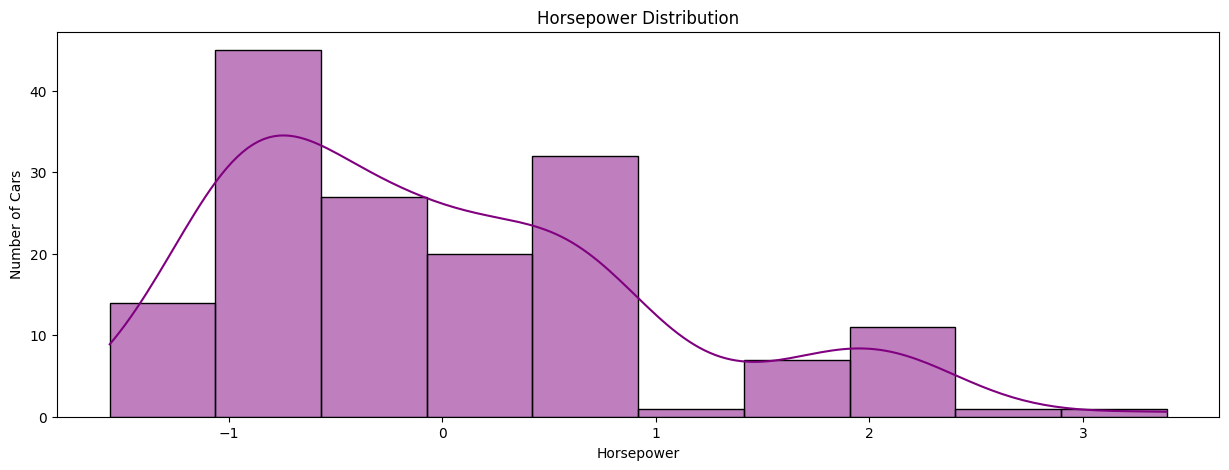

Exec time (Pandas dataframe):  0.1007262000348419


In [104]:
start_time = timeit.default_timer( )

plt.figure( figsize=(15, 5) )
sns.histplot( data=df, x='horsepower', bins=10, kde=True, color='purple' )
plt.xlabel( 'Horsepower' )
plt.ylabel( 'Number of Cars' )
plt.title( 'Horsepower Distribution' )
plt.show( )

stop_time = timeit.default_timer( )

print( "Exec time (Pandas dataframe): ", stop_time - start_time )

<b>(3.)NUMPY ARRAY:</b>

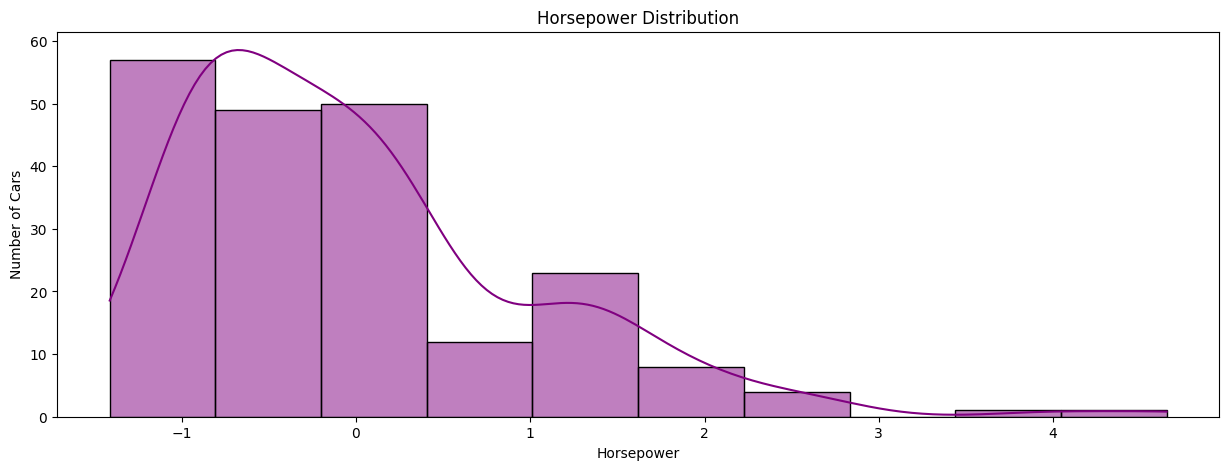

Exec time (NumPy array):  0.1064087999984622


In [105]:
start_time = timeit.default_timer( )

horsepower = data[:, 21].astype(float)

plt.figure( figsize=(15, 5) )
sns.histplot( horsepower, bins=10, kde=True, color='purple' )
plt.xlabel( 'Horsepower' )
plt.ylabel( 'Number of Cars' )
plt.title( 'Horsepower Distribution' )
plt.show( )

stop_time = timeit.default_timer( )

print( "Exec time (NumPy array): ", stop_time - start_time )

<b>4. Збудувати графік залежності одного integer/real атрибута від іншого.</b>

<b>(4.)PANDAS DATAFRAME:</b>

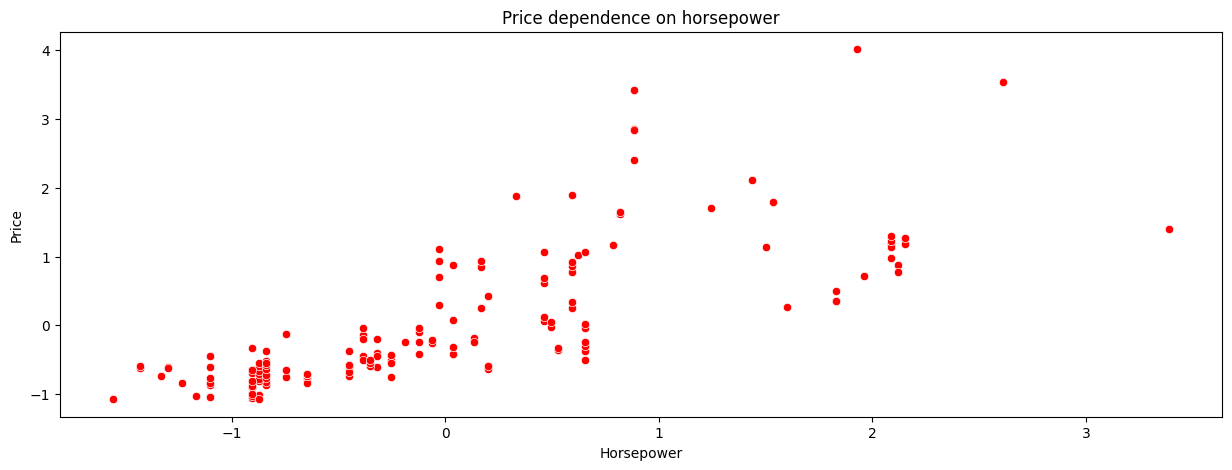

Exec time (Pandas dataframe):  0.08976590004749596


In [106]:
start_time = timeit.default_timer( )

plt.figure( figsize=(15, 5) )
sns.scatterplot( data=df, x='horsepower', y='price', color='red' )
plt.xlabel( 'Horsepower' )
plt.ylabel( 'Price' )
plt.title( 'Price dependence on horsepower' )
plt.show( )

stop_time = timeit.default_timer( )

print( "Exec time (Pandas dataframe): ", stop_time - start_time )

<b>(4.)NUMPY ARRAY:</b>

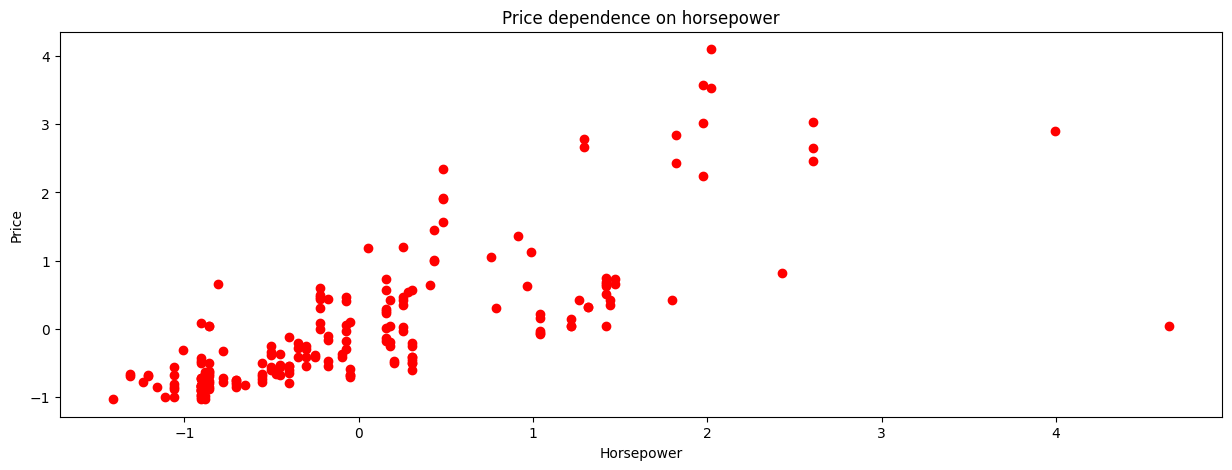

Exec time (NumPy array):  0.08583480003289878


In [107]:
start_time = timeit.default_timer( )

horsepower = data[ :, 21 ].astype( float )
price = data[ :, 25 ].astype( float )

plt.figure( figsize=(15, 5) )
plt.scatter( horsepower, price, color='red' )
plt.xlabel( 'Horsepower' )
plt.ylabel( 'Price' )
plt.title( 'Price dependence on horsepower' )
plt.show( )

stop_time = timeit.default_timer( )

print( "Exec time (NumPy array): ", stop_time - start_time )

<b>5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.</b>

In [108]:
from scipy.stats import pearsonr, spearmanr

<b>(5.)PANDAS DATAFRAME:</b>

In [109]:
start_time = timeit.default_timer( )

x = df[ 'horsepower' ].astype( float )
y = df[ 'price' ].astype( float )

pearson, _ = pearsonr( x, y )
spearman, _ = spearmanr( x, y )

stop_time = timeit.default_timer( )

print( "Exec time (Pandas dataframe): ", stop_time - start_time )
print( "Pearson:", pearson )
print( "Spearman:", spearman )

Exec time (Pandas dataframe):  0.0017398002091795206
Pearson: 0.7598739453800998
Spearman: 0.8610392048532152


<b>(5.)NUMPY ARRAY:</b>

In [110]:
start_time = timeit.default_timer( )

x = data[ :, 21 ].astype( float )
y = data[ :, 25 ].astype( float )

pearson, _ = pearsonr( x, y )
spearman, _ = spearmanr( x, y )

stop_time = timeit.default_timer( )

print( "Exec time (NumPy array): ", stop_time - start_time )
print( "Pearson:", pearson )
print( "Spearman:", spearman )

Exec time (NumPy array):  0.002387900138273835
Pearson: 0.759731211656671
Spearman: 0.8327756240938066


<b>6. Провести One Hot Encoding категоріального string атрибуту.</b>

In [111]:
from sklearn.preprocessing import OneHotEncoder

<b>(6.)PANDAS DATAFRAME:</b>

In [112]:
df_copy = df.copy( )

start_time = timeit.default_timer( )

onehotencoder = OneHotEncoder( sparse_output=False )

x = onehotencoder.fit_transform( df_copy[['fuel-type']] )

df_result = pd.DataFrame( x, columns=onehotencoder.get_feature_names_out(['fuel-type']) )

df_copy = pd.concat( [df_copy.reset_index(drop=True), df_result], axis=1 )

stop_time = timeit.default_timer( )

print( "Exec time (Pandas dataframe): ", stop_time - start_time )
print( df_copy[80:85] )

Exec time (Pandas dataframe):  0.00436319992877543
    symboling  normalized-losses      make fuel-type aspiration num-of-doors  \
80  -0.616761           1.118275    peugot    diesel      turbo         four   
81  -0.616761           1.118275    peugot       gas        std         four   
82  -0.616761           1.118275    peugot    diesel      turbo         four   
83  -0.616761           1.118275    peugot       gas      turbo         four   
84   0.221401          -0.059804  plymouth       gas        std          two   

   body-style drive-wheels engine-location  wheel-base  ...      bore  \
80      sedan          rwd           front    1.864733  ...  1.495776   
81      sedan          rwd           front    1.864733  ...  0.598028   
82      sedan          rwd           front    1.864733  ...  1.495776   
83      sedan          rwd           front    1.884085  ...  1.159121   
84  hatchback          fwd           front   -0.883256  ... -1.234874   

      stroke  compression-rat

<b>(6.)NUMPY ARRAY:</b>

In [113]:
data_copy = data.copy( )

fuel_type_column = data_copy[ :, 3 ].reshape( -1, 1 )

start_time = timeit.default_timer( )

onehotencoder = OneHotEncoder( sparse_output=False )
x_encoded = onehotencoder.fit_transform( fuel_type_column )

data_combined = np.hstack( (data_copy, x_encoded) )

stop_time = timeit.default_timer( )

print( "Exec time (NumPy array): ", stop_time - start_time )
print( data_combined[106:111] )

Exec time (NumPy array):  0.0021424000151455402
[['0.13350899705' '2.87139836013' 'nissan' 'gas' 'std' 'two' 'hatchback'
  'rwd' 'front' '0.07381545400' '0.36163756875' '0.93094741620'
  '-1.6511948473' '1.12326602762' 'ohcv' 'six' '1.30215162553' 'mpfi'
  '0.34627797059' '0.03750313751' '-0.2883489098' '1.41719758748'
  '0.14872193705' '-0.9530116883' '-0.8371953846' '0.66068822831' '0.0'
  '1.0']
 ['-0.6714717205' '0.88525324935' 'peugot' 'gas' 'std' 'four' 'sedan'
  'rwd' 'front' '1.52210876774' '1.02791634237' '1.16459606989'
  '1.22053537438' '0.89415935272' 'l' 'four' '-0.1662770945' 'mpfi'
  '0.45610827070' '-0.2177049353' '-0.4397745605' '-0.1743769205'
  '-0.2703570607' '-0.9530116883' '-0.9827637085' '-0.1672460953' '0.0'
  '1.0']
 ['-0.6714717205' '0.88525324935' 'peugot' 'diesel' 'turbo' 'four'
  'sedan' 'rwd' 'front' '1.52210876774' '1.02791634237' '1.16459606989'
  '1.22053537438' '1.23493146579' 'l' 'four' '0.60404616844' 'idi'
  '1.33475067157' '0.83502836544' '2.740164

<b>7. Провести візуалізацію багатовимірних даних.</b>

<b>(7.)PANDAS DATAFRAME:</b>

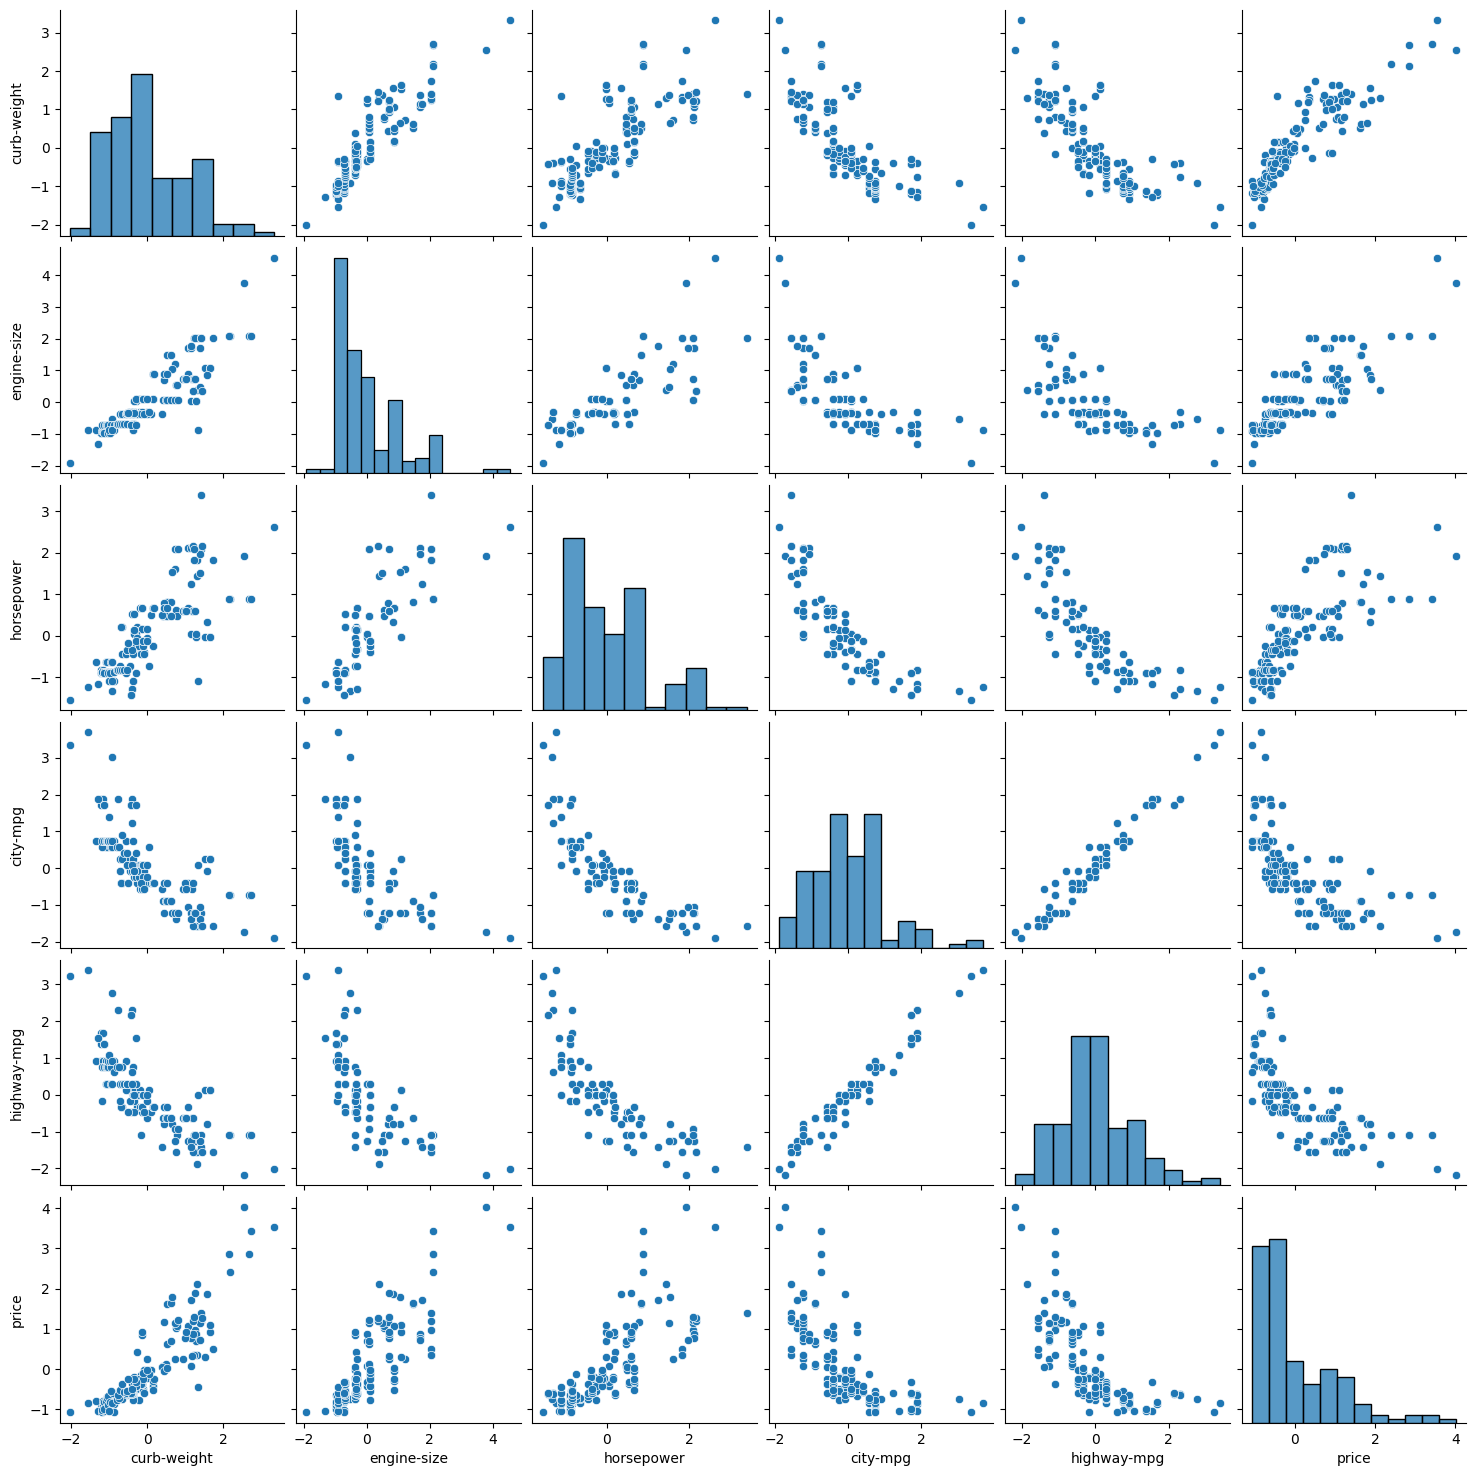

Exec time (Pandas dataframe):  2.8460079999640584


In [114]:
start_time = timeit.default_timer( )

selected_columns = [ 'curb-weight', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price' ]
sns.pairplot( df[selected_columns] )

# numeric_df = df.select_dtypes( include=['float64', 'int64'] )
# sns.pairplot( numeric_df )

plt.show( )

stop_time = timeit.default_timer( )

print( "Exec time (Pandas dataframe): ", stop_time - start_time )


<b>(7.)NUMPY ARRAY:</b>

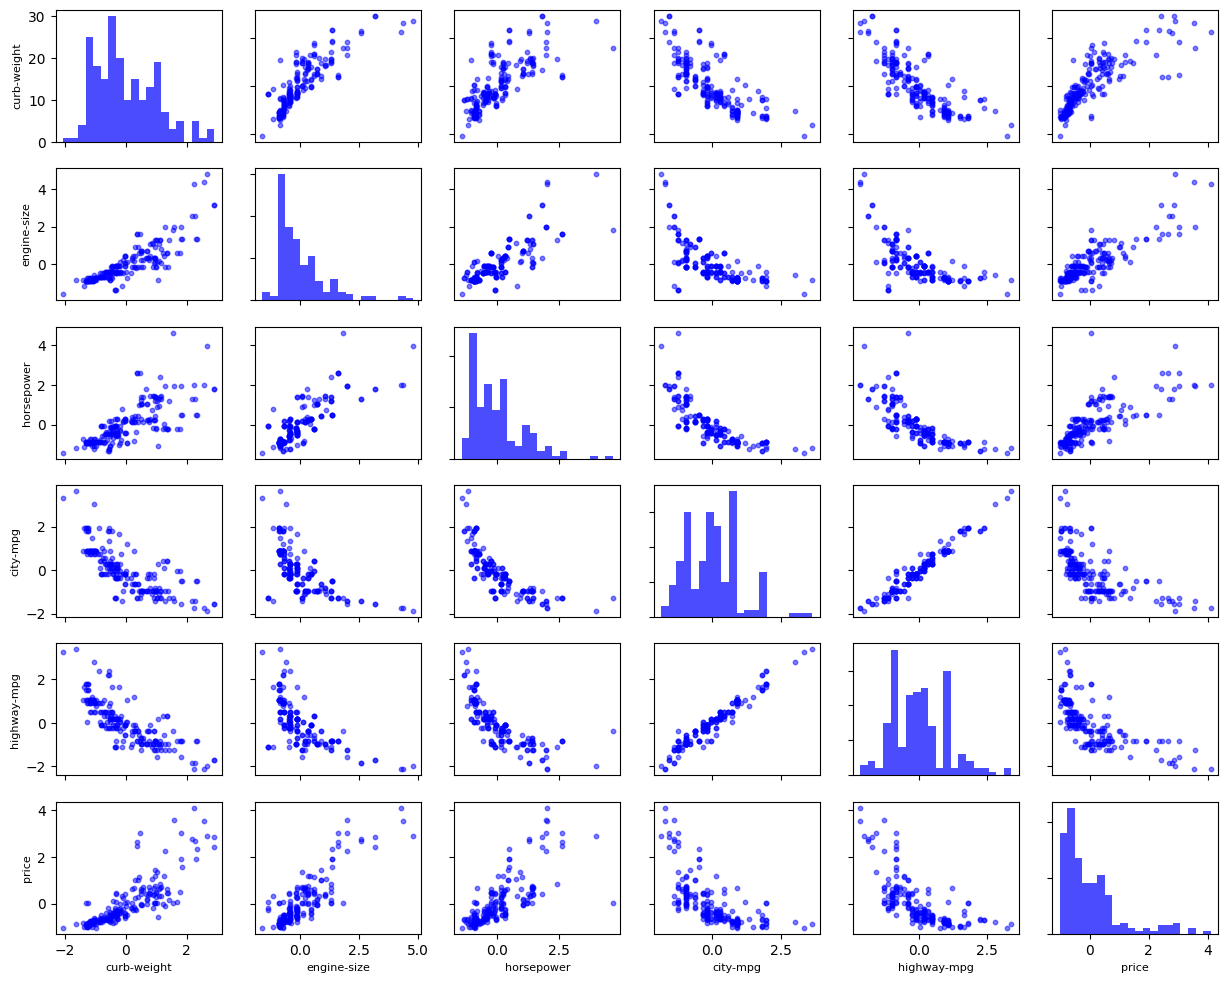

Exec time (NumPy array):  0.9931985000148416


In [115]:
start_time = timeit.default_timer( )

columns = [ 'symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors',
        'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
        'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
        'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price' ]

selected_columns = [ 'curb-weight', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price' ]

# selected_columns = [ 'symboling', 'normalized-losses', 'wheel-base', 'length','width','height',
#                     'curb-weight', 'engine-size', 'bore','stroke','compression-ratio','horsepower',
#                     'peak-rpm','city-mpg','highway-mpg','price']

selected_indices = [ columns.index(col) for col in selected_columns ]

numeric_data = data[ :, selected_indices ].astype(float )

n_vars = numeric_data.shape[ 1 ]

fig, axes = plt.subplots( n_vars, n_vars, figsize=(2.5 * n_vars, 2 * n_vars) )

for i in range( n_vars ) :
    for j in range( n_vars ) :
        ax = axes[ i, j ]
        if i == j :
            ax.hist( numeric_data[:, j], bins=20, color='blue', alpha=0.7 )
        else :
            ax.scatter( numeric_data[:, j], numeric_data[:, i], color='blue', s=10, alpha=0.5 )

        if i == n_vars - 1 :
            ax.set_xlabel( selected_columns[j], fontsize=8 )
        else :
            ax.set_xticklabels( [] )

        if j == 0 :
            ax.set_ylabel( selected_columns[i], fontsize=8 )
        else :
            ax.set_yticklabels( [] )

plt.show( )

stop_time = timeit.default_timer( )

print( "Exec time (NumPy array): ", stop_time - start_time )

<b>Висновок по другому рівню:</b>

In [118]:
data = {
    "Завдання": [
        "1. (1 спосіб)",
        "1. (2 спосіб)",
        "2.",
        "3.",
        "4.",
        "5.",
        "6.",
        "7."
    ],
    "Pandas (час виконання)": [
        0.0032146999146789312,
        0.01147759985178709,
        0.004735100083053112,  
        0.1007262000348419,  
        0.08976590004749596,
        0.0017398002091795206, 
        0.00436319992877543,
        2.8460079999640584
    ],
    "NumPy (час виконання)": [
        0.013114500092342496,
        0.0025753998197615147,
        0.004677699878811836,  
        0.1064087999984622,  
        0.08583480003289878,  
        0.002387900138273835,
        0.0021424000151455402,
        0.9931985000148416  
    ]
}

df_results = pd.DataFrame(data)

df_results

,Завдання,Pandas (час виконання),NumPy (час виконання)
0,1. (1 спосіб),0.003215,0.013115
1,1. (2 спосіб),0.011478,0.002575
2,2.,0.004735,0.004678
3,3.,0.100726,0.106409
4,4.,0.089766,0.085835
5,5.,0.001740,0.002388
6,6.,0.004363,0.002142
7,7.,2.846008,0.993199
